# AirBnB Dataset Rome Investigation

## Gather

In [40]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
pd.options.display.max_columns = 110

In [48]:
df = pd.read_csv('rome_summary_listings.csv')
df_detail = pd.read_csv('rome_detailed_listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

## Assess

In [17]:
df_detail.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2077,https://www.airbnb.com/rooms/2077,20190116045204,2019-01-16,Sallustiano - Centro storico,Casa Piave is a newly renovated two-bedroom ap...,****************************************** We ...,Casa Piave is a newly renovated two-bedroom ap...,none,You are in the historical center at 15 minutes...,SERVICES & FACILITIES The apartment is fully ...,Metro lines A and B plus several bus and tram ...,Gea will greet you and give you the keys.,"You can reach Gea any time by email, phone, (S...",1. CHECK-IN / CHECK-OUT Check-in starts at 2p...,NaN,NaN,https://a0.muscache.com/im/pictures/c89f6f67-b...,NaN,11756,https://www.airbnb.com/users/show/11756,Gea,2009-03-30,"Rome, Lazio, Italy","Hello to everybody,\r\nIt will be a pleasure t...",within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/11756/profile...,https://a0.muscache.com/im/users/11756/profile...,Sallustiano,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Rome, Lazio, Italy",Sallustiano,I Centro Storico,NaN,Rome,Lazio,00187,Rome,"Rome, Italy",IT,Italy,41.909614,12.499306,t,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",861.0,$70.00,NaN,NaN,$200.00,$85.00,2,$16.00,2,90,2,2,90,90,2.0,90.0,4 days ago,t,25,55,85,355,2019-01-16,56,20,2014-02-18,2019-01-03,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,flexible_new,f,f,1,1,0,0,0.94
1,2135,https://www.airbnb.com/rooms/2135,20190116045204,2019-01-16,Rome City Art Apartment penthouse x 4people,Charming apartment 4 persons last floor with n...,Girasolereale City Roma centro è un attico app...,Charming apartment 4 persons last floor with n...,none,"Quartiere famoso per arte, streetart, il cibo...","Price is base on 4 persons, min stay 3 nights.",The penthouse is a holiday apartment in Rome c...,l'intero appartamento di 2 camere una da letto...,Always interact with our guest. Italian mobile...,Weekly stay ExtraPrice: It is required 50 euro...,NaN,NaN,https://a0.muscache.com/im/pictures/59095535/8...,NaN,2330,https://www.airbnb.com/users/show/2330,Barbara,2008-08-20,"Rome, Lazio, Italy","BARBARA and Marco, good travellers, \r\nBarbar...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/2330/profile_...,https://a0.muscache.com/im/users/2330/profile_...,Te

In [15]:
col_names = df_detail.columns.tolist()
col_names[94]

'license'

In [16]:
df_detail['license'].value_counts()

QD/2016/0042781                                            5
€3.50 per person per night                                 4
QA/2017/28912                                              3
QA/2017/16111 -20/04/2017                                  3
14547841008                                                3
3.5                                                        2
/ LICENZA : ROMA CAPITALE dip. turismo SCIA Num. QA9425    2
QA/2018/35819                                              2
mcamtt87r19h501m                                           2
QA/2015/35015 del 31/12/2015                               1
fxvsdfgdg456                                               1
taxidforapartment6                                         1
QA/2017/0032281                                            1
h43fadfa34gf434                                            1
kjhdajksdh435                                              1
ewtwtwrtwrtwrter                                           1
sdfsf434eraert          

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2077,Sallustiano - Centro storico,11756,Gea,NaN,I Centro Storico,41.909614,12.499306,Entire home/apt,70,2,56,2019-01-03,0.94,1,355
1,2135,Rome City Art Apartment penthouse x 4people,2330,Barbara,NaN,VIII Appia Antica,41.872439,12.479622,Entire home/apt,76,2,7,2016-10-25,0.07,6,287
2,2141,Artist Residency Country House EUR,2330,Barbara,NaN,IX Eur,41.777806,12.427997,Private room,50,2,0,NaN,NaN,6,90
3,2737,"Single room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.872176,12.483547,Private room,18,15,7,2015-05-28,0.14,5,365
4,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.888258,12.470023,Private room,96,1,55,2017-10-31,0.44,3,365


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29806 entries, 0 to 29805
Data columns (total 16 columns):
id                                29806 non-null int64
name                              29784 non-null object
host_id                           29806 non-null int64
host_name                         29805 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     29806 non-null object
latitude                          29806 non-null float64
longitude                         29806 non-null float64
room_type                         29806 non-null object
price                             29806 non-null int64
minimum_nights                    29806 non-null int64
number_of_reviews                 29806 non-null int64
last_review                       23618 non-null object
reviews_per_month                 23618 non-null float64
calculated_host_listings_count    29806 non-null int64
availability_365                  29806 non-null int64
dt

In [8]:
df.shape

(29806, 16)

In [9]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.980600e+04,2.980600e+04,0.0,29806.000000,29806.000000,29806.000000,29806.000000,29806.000000,23618.000000,29806.000000,29806.000000
mean,1.498689e+07,6.032303e+07,NaN,41.892793,12.481186,97.683788,2.797826,35.258002,1.604958,6.358720,241.641851
std,9.444529e+06,6.594894e+07,NaN,0.033107,0.045505,143.545406,12.127613,57.528842,1.603700,14.211271,124.113712
min,2.077000e+03,1.822000e+03,NaN,41.655977,12.241988,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,6.361564e+06,9.291799e+06,NaN,41.884944,12.460555,50.000000,1.000000,1.000000,0.322500,1.000000,157.000000
50%,1.488690e+07,3.198188e+07,NaN,41.896414,12.477599,74.000000,2.000000,9.000000,1.030000,2.000000,290.000000
75%,2.306997e+07,9.690187e+07,NaN,41.906623,12.505004,109.000000,3.000000,45.000000,2.447500,5.000000,350.000000
max,3.159715e+07,2.368604e+08,NaN,42.121706,12.793864,9999.000000,1000.000000,611.000000,11.230000,144.000000,365.000000


In [10]:
df['host_id'].nunique()

15975

In [49]:
calendar.sample(25)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2810972,6696908,2019-11-04,f,$90.00,$90.00,1,1125
8690208,24489868,2019-03-30,t,$83.00,$83.00,1,6
1658185,3676515,2019-02-20,t,$100.00,$100.00,3,60
6736906,18940946,2019-04-26,f,$150.00,$150.00,3,1124
10541203,30708533,2019-11-10,t,$200.00,$200.00,3,1125
6324150,17599915,2019-09-08,t,$159.00,$159.00,1,1125
7440849,21175330,2019-03-29,f,$35.00,$35.00,3,30
10391503,30083559,2019-12-20,t,$107.00,$107.00,2,1125
5889293,16432953,2019-05-22,t,$139.00,$132.00,2,180
3466832,8836695,2019-06-01,f,$70.00,$70.00,1,1125


In [70]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10879190 entries, 0 to 10879189
Data columns (total 7 columns):
listing_id        int64
date              datetime64[ns]
available         object
price             float64
adjusted_price    float64
minimum_nights    int64
maximum_nights    int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 581.0+ MB


In [51]:
calendar['price'] = calendar['price'].str.strip('$')
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = pd.to_numeric(calendar['price']).astype('float64').round(2)

In [64]:
calendar['adjusted_price'] = calendar['adjusted_price'].str.strip('$')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',', '')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price']).astype('float64').round(2)

In [65]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,111424,2019-01-16,f,49.0,49.0,3,10
1,111424,2019-01-17,t,49.0,49.0,3,10
2,111424,2019-01-18,t,49.0,49.0,3,10
3,111424,2019-01-19,t,49.0,49.0,3,10
4,111424,2019-01-20,t,49.0,49.0,3,10


In [71]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.sort_values(by='date')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,111424,2019-01-16,f,49.0,49.0,3,10
2846514,6664598,2019-01-16,t,70.0,70.0,1,1125
6246840,17518938,2019-01-16,t,27.0,27.0,2,1125
2846903,6665226,2019-01-16,t,40.0,40.0,1,1124
1016778,1927864,2019-01-16,t,27.0,27.0,1,30
2847124,6734767,2019-01-16,f,59.0,59.0,1,1125
1016526,2005657,2019-01-16,t,140.0,140.0,1,1125
4381000,11474041,2019-01-16,f,50.0,50.0,1,28
4380999,11162018,2019-01-16,f,90.0,90.0,2,90
10707065,31199620,2019-01-16,f,80.0,80.0,2,1125


In [73]:
calendar.groupby('date')['price'].mean()

date
2019-01-16     82.990572
2019-01-17     83.242468
2019-01-18     84.865530
2019-01-19     85.379487
2019-01-20     83.134302
2019-01-21     82.722371
2019-01-22     82.769040
2019-01-23     82.823928
2019-01-24     82.925921
2019-01-25     85.089781
2019-01-26     85.486278
2019-01-27     83.275918
2019-01-28     82.840468
2019-01-29     82.829195
2019-01-30     82.881601
2019-01-31     83.028115
2019-02-01     87.327518
2019-02-02     87.789069
2019-02-03     85.772495
2019-02-04     85.289338
2019-02-05     85.265886
2019-02-06     85.395558
2019-02-07     85.702677
2019-02-08     87.898947
2019-02-09     88.137120
2019-02-10     85.973663
2019-02-11     85.764745
2019-02-12     85.799873
2019-02-13     86.038449
2019-02-14     86.772495
                 ...    
2019-12-17    108.473462
2019-12-18    108.453063
2019-12-19    108.730088
2019-12-20    115.166946
2019-12-21    115.808260
2019-12-22    114.426055
2019-12-23    114.703113
2019-12-24    115.506509
2019-12-25    116.17

In [81]:
calendar.groupby(calendar['date'].dt.strftime('%Y:%B'))['price'].mean().sort_values()

date
2019:January       83.517811
2019:February      86.736799
2019:March         96.601940
2019:April        107.999321
2019:November     108.684334
2019:August       108.779759
2019:July         108.901580
2019:May          109.264183
2019:June         109.981327
2019:December     112.769582
2019:September    113.048591
2019:October      113.982645
2020:January      115.837912
Name: price, dtype: float64

In [76]:
g = calendar.groupby(pd.Grouper(freq="M"))

AttributeError: 'Series' object has no attribute 'pd'

 - Missing values (NaN)
 - StartDate inconsistencies (ASAP)
 - Nondescriptive column headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

## Clean

#### Define

- Select all records in the StartDate column that have "As soon as possible" and "immediately" etc. and replace the text in those cells with "ASAP".
- Select all nondescriptive and misspelt column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, ReqiredQualifications, JobRequirement)

#### Code

In [11]:
df_clean = df.copy()

In [12]:
df_clean = df_clean.rename(columns={'ApplicationP': 'ApplicationProcedure',
                                    'AboutC': 'AboutCompany',
                                     'RequiredQual': 'RequiredQualifications',
                                     'JobRequirment': 'JobRequirement'})

In [14]:
df_clean.StartDate.value_counts()

ASAP                                                                                                                                            4754
Immediately                                                                                                                                      773
As soon as possible                                                                                                                              543
Upon hiring                                                                                                                                      261
Immediate                                                                                                                                        259
Immediate employment                                                                                                                             140
As soon as possible.                                                                                      

In [15]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

for row in df_clean:
    df_clean.StartDate.replace(to_replace = asap_list , value='ASAP' , inplace=True)

#### Test

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost                   19001 non-null object
date                      19001 non-null object
Title                     18973 non-null object
Company                   18994 non-null object
AnnouncementCode          1208 non-null object
Term                      7676 non-null object
Eligibility               4930 non-null object
Audience                  640 non-null object
StartDate                 9675 non-null object
Duration                  10798 non-null object
Location                  18969 non-null object
JobDescription            15110 non-null object
JobRequirement            16479 non-null object
RequiredQualifications    18517 non-null object
Salary                    9623 non-null object
ApplicationProcedure      18941 non-null object
OpeningDate               18295 non-null object
Deadline                  18936 non-null object
Notes                     2211 non

In [17]:
df_clean.StartDate.value_counts()

ASAP                                                   6856
01 September 2012                                        31
March 2006                                               27
November 2006                                            22
January 2010                                             19
February 2014                                            17
01 February 2005                                         17
February 2011                                            16
September 2010                                           16
TBD                                                      16
September 2008                                           15
March 2011                                               15
01 July 2014                                             14
February 2007                                            14
01 February 2015                                         14
January 2016                                             13
01 March 2006                           

In [19]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

## Analysis & Visualization

In [20]:
# Number of 'ASAP' start dates (numerator)
asap_counts = df_clean.StartDate.value_counts()['ASAP']
asap_counts

6856

In [21]:
# Number of non-empty start dates (denominator)
non_empty_counts = df_clean.StartDate.count()
non_empty_counts

9675

In [22]:
# Percentage of positions with an urgent start date ie ASAP
asap_counts/non_empty_counts

0.70863049095607233

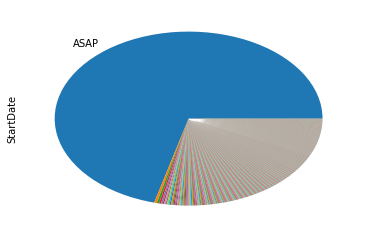

In [23]:
%matplotlib inline
import numpy as np
labels = np.full(len(df_clean.StartDate.value_counts()),"",dtype=object)
labels[0]='ASAP'
df_clean.StartDate.value_counts().plot(kind="pie",labels=labels);